# Perceptron Algorithm - From Scratch  
In this notebook, we will implement the **Perceptron** algorithm from scratch using **NumPy only**.  
We will:  
- Generate a simple 2D dataset  
- Implement the Perceptron class  
- Train the model  
- Visualize the decision boundary  
- Evaluate accuracy  

# What is the Perceptron?  
The Perceptron is one of the earliest linear classifiers.  
It tries to find a straight line (decision boundary) that separates two classes.  
It updates its weights only when a sample is misclassified.

**Prediction rule:**  
$
[
\hat{y} = 1 \;\text{if}\; (w^T x + b) \ge 0 \;\text{else}\; -1
]
$

**Update rule:**  
$[
w = w + \eta \cdot y_i \cdot x_i
]
$
$[
b = b + \eta \cdot y_i
]
$


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

## 1. Generate 2D binary dataset

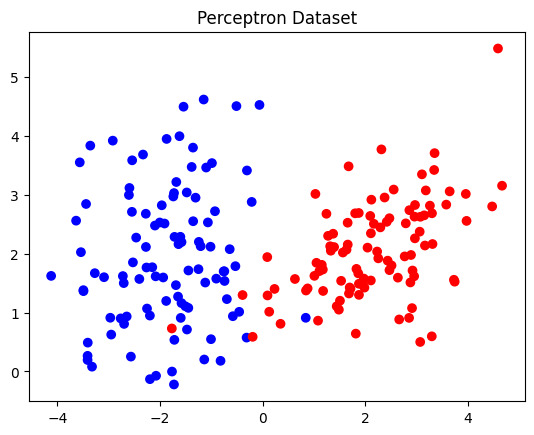

In [4]:
np.random.seed(42)

# Generate 2D binary dataset
X, y = make_classification(
    n_samples=200,
    n_features=2,
    n_redundant=0,
    n_clusters_per_class=1,
    class_sep=2.0
)

y = y.reshape(-1, 1)

plt.scatter(X[:,0], X[:,1], c=y.ravel(), cmap="bwr")
plt.title("Perceptron Dataset")
plt.show()

## 2. Perceptron Class

In [5]:
class Perceptron:
    def __init__(self, lr=0.1, epochs=100):
        self.lr = lr
        self.epochs = epochs
        
    def predict(self, X):
        linear_output = X @ self.weights + self.bias
        return (linear_output >= 0).astype(int)
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        self.weights = np.zeros((n_features, 1))
        self.bias = 0
        
        for _ in range(self.epochs):
            for i in range(n_samples):
                xi = X[i].reshape(1, -1)
                yi = y[i]
                
                y_pred = self.predict(xi)
                update = self.lr * (yi - y_pred)
                
                self.weights += update * xi.reshape(n_features, 1)
                self.bias += update


## 3. Train Model

In [6]:
model = Perceptron(lr=0.1, epochs=20)
model.fit(X, y)

y_pred = model.predict(X)
print("Accuracy:", np.mean(y_pred == y))


Accuracy: 0.97


## 4. Decision Boundary Plot

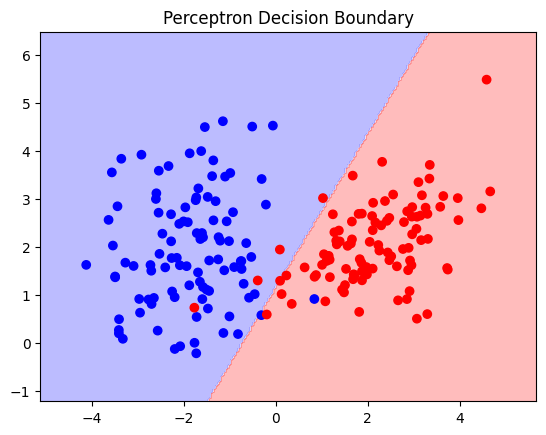

In [7]:
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 200),
    np.linspace(y_min, y_max, 200)
)

grid = np.c_[xx.ravel(), yy.ravel()]
zz = model.predict(grid).reshape(xx.shape)

plt.contourf(xx, yy, zz, cmap="bwr", alpha=0.3)
plt.scatter(X[:,0], X[:,1], c=y.ravel(), cmap="bwr")
plt.title("Perceptron Decision Boundary")
plt.show()


##  Model Evaluation

- **Accuracy:** 0.97  
- The perceptron successfully learned a **linear decision boundary**, which matches the theoretical behavior of the algorithm.  
- The separation line clearly divides the two classes since the dataset is **linearly separable**.  
- Most misclassifications occur near the boundary, which is expected because the perceptron does not model probabilities.  
- Overall, the model performs very well and converges quickly using simple weight updates.
